In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from utils import plot_ds

In [2]:
dataObj = datasets.load_iris()

In [7]:
df = pd.DataFrame(dataObj.data, columns=dataObj.feature_names)
df['target'] = dataObj.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [12]:
X = df.iloc[:,[2,3]].values
# y = df['target'].values
y = df.iloc[:,4].values

In [13]:
X.shape

(150, 2)

In [14]:
y.shape

(150,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [17]:
X_test.shape

(45, 2)

In [18]:
sc = StandardScaler()

In [19]:
sc.fit(X_train)

StandardScaler()

In [21]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [23]:
ppn = Perceptron(
    eta0=0.01,
    random_state=0,
    verbose=1,
    n_iter_no_change=10
)

In [24]:
ppn.fit(X_train_std, y_train)

-- Epoch 1
Norm: 0.02, NNZs: 2, Bias: -0.010000, T: 105, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 2, Bias: -0.010000, T: 210, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 2, Bias: -0.010000, T: 315, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 2, Bias: -0.010000, T: 420, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 2, Bias: -0.010000, T: 525, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 2, Bias: -0.010000, T: 630, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.02, NNZs: 2, Bias: -0.010000, T: 735, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.02, NNZs: 2, Bias: -0.010000, T: 840, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.02, NNZs: 2, Bias: -0.010000, T: 945, Avg. loss: 0.000000
Total training time: 0.00 s

Perceptron(eta0=0.01, n_iter_no_change=10, verbose=1)

In [26]:
ppn.predict(X_train_std)

array([2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 1,
       0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 2, 1,
       2, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1,
       0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2])

In [27]:
accuracy_score(y_train, ppn.predict(X_train_std))

0.8666666666666667

In [28]:
accuracy_score(y_test, ppn.predict(X_test_std))

0.9111111111111111

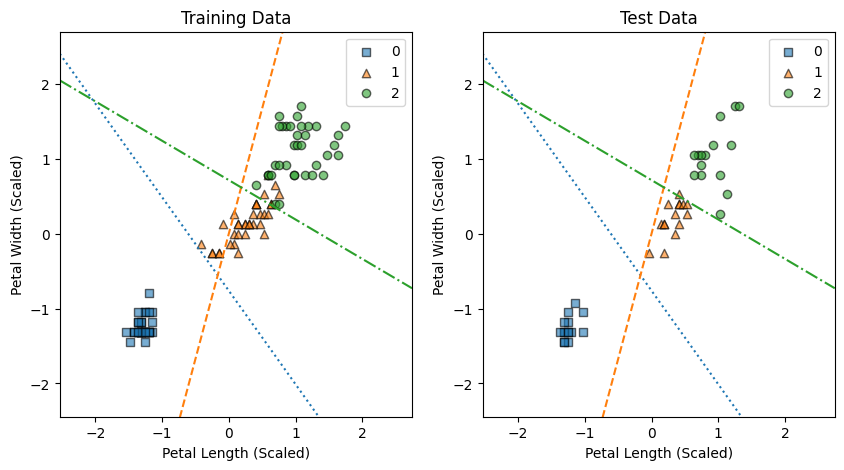

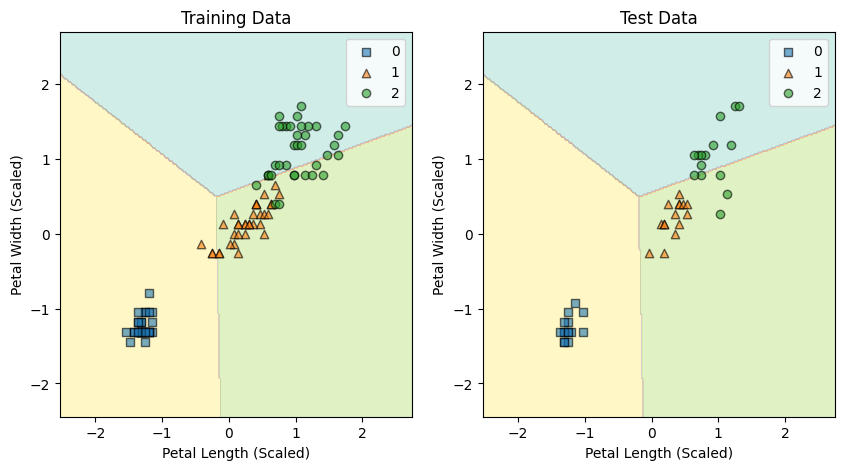

In [29]:
plot_ds(X_train_std, X_test_std, y_train, y_test, ppn)

In [30]:
X1_min = X[:,0].min()
X1_max = X[:,0].max()
X2_min = X[:,1].min()
X2_max = X[:,1].max()

In [31]:
X1_new = np.random.uniform(low=X1_min, high=X1_max, size=(50,1))
X2_new = np.random.uniform(low=X2_min, high=X2_max, size=(50,1))
X_new = np.concatenate( (X1_new, X2_new) , axis=1)
temp = pd.DataFrame(X_new, columns=['X1','X2'])
temp.head()

,X1,X2
0,6.833596,0.593089
1,6.756348,0.440315
2,1.625875,0.916583
3,3.728210,2.113975
4,2.653202,2.108078


In [32]:
X_new_std =  sc.transform(X_new)

In [33]:
ppn.predict(X_new_std)

array([1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1,
       2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2,
       1, 2, 2, 1, 0, 1])